In [82]:
using OffsetArrays, Statistics
include("../code/bp_full.jl")
include("../code/bp.jl")

plot_rdb (generic function with 1 method)

In [93]:
f1 = 1/100
f2 = 0.8
f3 = 1 - f1 -f2
Lambda = [f1,f2,f3]
K = [0,0,1]
n = 18000
nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=10))
m = Int(nedges/3)

13080

In [99]:
H = 2
s = rand((-1,1), n)
efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
bp = bp_full(n, m, nedges, Lambda, K, efield)
# find basis with leaf removal
B, freevars = findbasis(bp.H)
R = size(B,2)/n

0.2733333333333333

In [118]:
err,iters = iteration!(bp; maxiter=10^5, damp=0.5, rein=5e-4)

(0.17196118174896802, 100000)

In [119]:
nunsat, ovl, dist = performance(bp,s)

(3, 0.5438888888888889, 0.22805555555555557)

In [120]:
x = argmax.(bp.belief) .== 2
σ = fix_indep!(x, B, freevars)
dist = distortion(s,σ)

0.22894444444444445

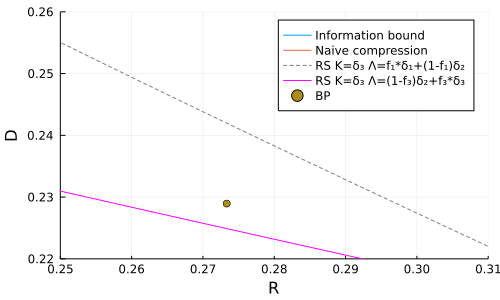

In [121]:
pl = plot_rdb()
scatter!([R], [dist], label="BP")
xlims!((0.25,0.31)); ylims!((0.22,0.26))
plot!(pl, size=(500,300))

In [59]:
# nunsat, ovl, dist = decimate!(bp, efield, freevars, s, maxiter=1000, Tmax=1, tol=1e-4, 
#     callback=cb_decimation, fair_decimation=true) 

Avg distortion after 1st BP round: 0.2299635391327179
 Step    0. Free = 1641. Maxfield = -Inf. ε = 1.39E-02. Unsat = 201. Ovl = 0.602. Iters 1000
 Step    1. Free = 1640. Maxfield = 1.00E+00. ε = 2.36E-03. Unsat = 201. Ovl = 0.602. Iters 1000
 Step    2. Free = 1639. Maxfield = 1.00E+00. ε = 4.01E-04. Unsat = 197. Ovl = 0.601. Iters 1000
 Step    3. Free = 1638. Maxfield = 1.00E+00. ε = 9.91E-05. Unsat = 199. Ovl = 0.601. Iters 581
 Step    4. Free = 1637. Maxfield = 1.00E+00. ε = 9.74E-05. Unsat = 199. Ovl = 0.601. Iters 7
 Step    5. Free = 1636. Maxfield = 1.00E+00. ε = 9.84E-05. Unsat = 199. Ovl = 0.601. Iters 7
 Step    6. Free = 1635. Maxfield = 1.00E+00. ε = 1.00E-04. Unsat = 199. Ovl = 0.601. Iters 7
 Step    7. Free = 1634. Maxfield = 1.00E+00. ε = 9.87E-05. Unsat = 199. Ovl = 0.601. Iters 34
 Step    8. Free = 1633. Maxfield = 1.00E+00. ε = 9.51E-05. Unsat = 199. Ovl = 0.601. Iters 7
 Step    9. Free = 1632. Maxfield = 1.00E+00. ε = 9.59E-05. Unsat = 199. Ovl = 0.601. Iters 

 Step   87. Free = 1554. Maxfield = 1.00E+00. ε = 7.86E-05. Unsat = 197. Ovl = 0.601. Iters 11
 Step   88. Free = 1553. Maxfield = 1.00E+00. ε = 8.82E-05. Unsat = 197. Ovl = 0.601. Iters 23
 Step   89. Free = 1552. Maxfield = 1.00E+00. ε = 5.65E-05. Unsat = 197. Ovl = 0.601. Iters 20
 Step   90. Free = 1551. Maxfield = 1.00E+00. ε = 6.05E-05. Unsat = 197. Ovl = 0.601. Iters 14
 Step   91. Free = 1550. Maxfield = 1.00E+00. ε = 5.17E-05. Unsat = 197. Ovl = 0.601. Iters 14
 Step   92. Free = 1549. Maxfield = 1.00E+00. ε = 7.67E-05. Unsat = 197. Ovl = 0.601. Iters 10
 Step   93. Free = 1548. Maxfield = 1.00E+00. ε = 6.86E-05. Unsat = 197. Ovl = 0.601. Iters 17
 Step   94. Free = 1547. Maxfield = 1.00E+00. ε = 9.41E-05. Unsat = 197. Ovl = 0.601. Iters 11
 Step   95. Free = 1546. Maxfield = 1.00E+00. ε = 9.77E-05. Unsat = 197. Ovl = 0.601. Iters 9
 Step   96. Free = 1545. Maxfield = 1.00E+00. ε = 8.34E-05. Unsat = 197. Ovl = 0.601. Iters 11
 Step   97. Free = 1544. Maxfield = 1.00E+00. ε = 7

 Step  175. Free = 1466. Maxfield = 9.99E-01. ε = 9.81E-05. Unsat = 197. Ovl = 0.601. Iters 93
 Step  176. Free = 1465. Maxfield = 9.99E-01. ε = 9.83E-05. Unsat = 197. Ovl = 0.601. Iters 21
 Step  177. Free = 1464. Maxfield = 9.99E-01. ε = 9.95E-05. Unsat = 197. Ovl = 0.601. Iters 23
 Step  178. Free = 1463. Maxfield = 9.99E-01. ε = 8.85E-05. Unsat = 197. Ovl = 0.601. Iters 21
 Step  179. Free = 1462. Maxfield = 9.99E-01. ε = 7.65E-05. Unsat = 197. Ovl = 0.601. Iters 21
 Step  180. Free = 1461. Maxfield = 9.99E-01. ε = 8.84E-05. Unsat = 197. Ovl = 0.601. Iters 21
 Step  181. Free = 1460. Maxfield = 9.99E-01. ε = 8.82E-05. Unsat = 197. Ovl = 0.601. Iters 26
 Step  182. Free = 1459. Maxfield = 9.99E-01. ε = 9.67E-05. Unsat = 197. Ovl = 0.601. Iters 24
 Step  183. Free = 1458. Maxfield = 9.99E-01. ε = 9.21E-05. Unsat = 197. Ovl = 0.601. Iters 25
 Step  184. Free = 1457. Maxfield = 9.99E-01. ε = 8.69E-05. Unsat = 197. Ovl = 0.601. Iters 21
 Step  185. Free = 1456. Maxfield = 9.99E-01. ε = 

 Step  263. Free = 1378. Maxfield = 9.98E-01. ε = 8.35E-05. Unsat = 194. Ovl = 0.600. Iters 37
 Step  264. Free = 1377. Maxfield = 9.98E-01. ε = 9.57E-05. Unsat = 194. Ovl = 0.600. Iters 25
 Step  265. Free = 1376. Maxfield = 9.98E-01. ε = 9.94E-05. Unsat = 194. Ovl = 0.600. Iters 62
 Step  266. Free = 1375. Maxfield = 9.98E-01. ε = 8.64E-05. Unsat = 194. Ovl = 0.600. Iters 20
 Step  267. Free = 1374. Maxfield = 9.99E-01. ε = 9.53E-05. Unsat = 194. Ovl = 0.600. Iters 15
 Step  268. Free = 1373. Maxfield = 9.98E-01. ε = 9.54E-05. Unsat = 194. Ovl = 0.600. Iters 37
 Step  269. Free = 1372. Maxfield = 9.98E-01. ε = 9.92E-05. Unsat = 194. Ovl = 0.600. Iters 68
 Step  270. Free = 1371. Maxfield = 9.99E-01. ε = 9.39E-05. Unsat = 194. Ovl = 0.600. Iters 37
 Step  271. Free = 1370. Maxfield = 9.98E-01. ε = 9.74E-05. Unsat = 194. Ovl = 0.600. Iters 41
 Step  272. Free = 1369. Maxfield = 9.98E-01. ε = 9.00E-05. Unsat = 194. Ovl = 0.600. Iters 32
 Step  273. Free = 1368. Maxfield = 1.00E+00. ε = 

 Step  351. Free = 1290. Maxfield = 9.97E-01. ε = 9.69E-05. Unsat = 194. Ovl = 0.600. Iters 170
 Step  352. Free = 1289. Maxfield = 9.97E-01. ε = 9.96E-05. Unsat = 194. Ovl = 0.600. Iters 259
 Step  353. Free = 1288. Maxfield = 9.96E-01. ε = 9.73E-05. Unsat = 194. Ovl = 0.600. Iters 228
 Step  354. Free = 1287. Maxfield = 9.96E-01. ε = 1.00E-04. Unsat = 194. Ovl = 0.600. Iters 40
 Step  355. Free = 1286. Maxfield = 9.96E-01. ε = 9.82E-05. Unsat = 194. Ovl = 0.600. Iters 61
 Step  356. Free = 1285. Maxfield = 9.96E-01. ε = 9.72E-05. Unsat = 194. Ovl = 0.600. Iters 364
 Step  357. Free = 1284. Maxfield = 9.96E-01. ε = 9.87E-05. Unsat = 194. Ovl = 0.600. Iters 77
 Step  358. Free = 1283. Maxfield = 9.96E-01. ε = 9.90E-05. Unsat = 194. Ovl = 0.600. Iters 154
 Step  359. Free = 1282. Maxfield = 9.96E-01. ε = 9.79E-05. Unsat = 194. Ovl = 0.600. Iters 166
 Step  360. Free = 1281. Maxfield = 9.96E-01. ε = 9.89E-05. Unsat = 193. Ovl = 0.600. Iters 62
 Step  361. Free = 1280. Maxfield = 9.98E-01

 Step  437. Free = 1204. Maxfield = 9.95E-01. ε = 8.57E-05. Unsat = 186. Ovl = 0.597. Iters 43
 Step  438. Free = 1203. Maxfield = 9.95E-01. ε = 9.06E-05. Unsat = 188. Ovl = 0.598. Iters 115
 Step  439. Free = 1202. Maxfield = 9.94E-01. ε = 9.98E-05. Unsat = 188. Ovl = 0.598. Iters 264
 Step  440. Free = 1201. Maxfield = 9.94E-01. ε = 9.86E-05. Unsat = 184. Ovl = 0.597. Iters 93
 Step  441. Free = 1200. Maxfield = 1.00E+00. ε = 8.68E-05. Unsat = 184. Ovl = 0.597. Iters 14
 Step  442. Free = 1199. Maxfield = 9.94E-01. ε = 9.87E-05. Unsat = 188. Ovl = 0.598. Iters 143
 Step  443. Free = 1198. Maxfield = 1.00E+00. ε = 9.40E-05. Unsat = 188. Ovl = 0.598. Iters 14
 Step  444. Free = 1197. Maxfield = 9.94E-01. ε = 9.97E-05. Unsat = 186. Ovl = 0.597. Iters 390
 Step  445. Free = 1196. Maxfield = 9.94E-01. ε = 9.94E-05. Unsat = 186. Ovl = 0.597. Iters 293
 Step  446. Free = 1195. Maxfield = 9.94E-01. ε = 9.86E-05. Unsat = 186. Ovl = 0.597. Iters 229
 Step  447. Free = 1194. Maxfield = 9.94E-01

 Step  523. Free = 1118. Maxfield = 1.00E+00. ε = 9.64E-02. Unsat = 191. Ovl = 0.597. Iters 1000
 Step  524. Free = 1117. Maxfield = 9.93E-01. ε = 8.51E-02. Unsat = 195. Ovl = 0.599. Iters 1000
 Step  525. Free = 1116. Maxfield = 9.92E-01. ε = 1.09E-01. Unsat = 179. Ovl = 0.595. Iters 1000
 Step  526. Free = 1115. Maxfield = 9.92E-01. ε = 6.75E-02. Unsat = 180. Ovl = 0.595. Iters 1000
 Step  527. Free = 1114. Maxfield = 9.92E-01. ε = 1.08E-01. Unsat = 190. Ovl = 0.596. Iters 1000
 Step  528. Free = 1113. Maxfield = 9.92E-01. ε = 8.09E-02. Unsat = 190. Ovl = 0.598. Iters 1000
 Step  529. Free = 1112. Maxfield = 9.95E-01. ε = 1.25E-01. Unsat = 176. Ovl = 0.594. Iters 1000
 Step  530. Free = 1111. Maxfield = 9.92E-01. ε = 1.80E-01. Unsat = 187. Ovl = 0.596. Iters 1000
 Step  531. Free = 1110. Maxfield = 1.00E+00. ε = 1.15E-01. Unsat = 189. Ovl = 0.598. Iters 1000
 Step  532. Free = 1109. Maxfield = 9.94E-01. ε = 1.55E-01. Unsat = 177. Ovl = 0.594. Iters 1000
 Step  533. Free = 1108. Maxfi

 Step  609. Free = 1032. Maxfield = 9.89E-01. ε = 2.19E-01. Unsat = 230. Ovl = 0.603. Iters 1000
 Step  610. Free = 1031. Maxfield = 9.88E-01. ε = 1.65E-01. Unsat = 232. Ovl = 0.605. Iters 1000
 Step  611. Free = 1030. Maxfield = 9.89E-01. ε = 1.79E-01. Unsat = 221. Ovl = 0.603. Iters 1000
 Step  612. Free = 1029. Maxfield = 9.98E-01. ε = 1.89E-01. Unsat = 227. Ovl = 0.604. Iters 1000
 Step  613. Free = 1028. Maxfield = 9.89E-01. ε = 2.57E-01. Unsat = 224. Ovl = 0.603. Iters 1000
 Step  614. Free = 1027. Maxfield = 9.98E-01. ε = 2.57E-01. Unsat = 222. Ovl = 0.603. Iters 1000
 Step  615. Free = 1026. Maxfield = 9.89E-01. ε = 1.64E-01. Unsat = 221. Ovl = 0.600. Iters 1000
 Step  616. Free = 1025. Maxfield = 9.92E-01. ε = 1.76E-01. Unsat = 217. Ovl = 0.601. Iters 1000
 Step  617. Free = 1024. Maxfield = 9.91E-01. ε = 1.99E-01. Unsat = 210. Ovl = 0.600. Iters 1000
 Step  618. Free = 1023. Maxfield = 9.96E-01. ε = 2.15E-01. Unsat = 229. Ovl = 0.603. Iters 1000
 Step  619. Free = 1022. Maxfi

 Step  695. Free = 946. Maxfield = 9.98E-01. ε = 3.39E-01. Unsat = 188. Ovl = 0.592. Iters 1000
 Step  696. Free = 945. Maxfield = 9.92E-01. ε = 4.44E-01. Unsat = 197. Ovl = 0.595. Iters 1000
 Step  697. Free = 944. Maxfield = 9.94E-01. ε = 3.24E-01. Unsat = 186. Ovl = 0.591. Iters 1000
 Step  698. Free = 943. Maxfield = 9.97E-01. ε = 3.74E-01. Unsat = 196. Ovl = 0.594. Iters 1000
 Step  699. Free = 942. Maxfield = 1.00E+00. ε = 3.43E-01. Unsat = 180. Ovl = 0.589. Iters 1000
 Step  700. Free = 941. Maxfield = 9.91E-01. ε = 4.31E-01. Unsat = 181. Ovl = 0.592. Iters 1000
 Step  701. Free = 940. Maxfield = 1.00E+00. ε = 3.42E-01. Unsat = 176. Ovl = 0.591. Iters 1000
 Step  702. Free = 939. Maxfield = 9.91E-01. ε = 3.31E-01. Unsat = 184. Ovl = 0.594. Iters 1000
 Step  703. Free = 938. Maxfield = 9.93E-01. ε = 2.88E-01. Unsat = 178. Ovl = 0.592. Iters 1000
 Step  704. Free = 937. Maxfield = 9.91E-01. ε = 3.04E-01. Unsat = 197. Ovl = 0.596. Iters 1000
 Step  705. Free = 936. Maxfield = 9.97E

 Step  783. Free = 858. Maxfield = 9.83E-01. ε = 5.15E-04. Unsat = 161. Ovl = 0.590. Iters 1000
 Step  784. Free = 857. Maxfield = 9.83E-01. ε = 4.52E-04. Unsat = 160. Ovl = 0.590. Iters 1000
 Step  785. Free = 856. Maxfield = 9.82E-01. ε = 1.73E-04. Unsat = 160. Ovl = 0.590. Iters 1000
 Step  786. Free = 855. Maxfield = 1.00E+00. ε = 9.90E-05. Unsat = 160. Ovl = 0.590. Iters 884
 Step  787. Free = 854. Maxfield = 9.83E-01. ε = 2.72E-04. Unsat = 161. Ovl = 0.590. Iters 1000
 Step  788. Free = 853. Maxfield = 9.98E-01. ε = 1.55E-04. Unsat = 160. Ovl = 0.589. Iters 1000
 Step  789. Free = 852. Maxfield = 9.83E-01. ε = 2.21E-04. Unsat = 159. Ovl = 0.589. Iters 1000
 Step  790. Free = 851. Maxfield = 9.98E-01. ε = 1.00E-04. Unsat = 159. Ovl = 0.589. Iters 451
 Step  791. Free = 850. Maxfield = 9.83E-01. ε = 9.98E-05. Unsat = 160. Ovl = 0.589. Iters 568
 Step  792. Free = 849. Maxfield = 9.97E-01. ε = 9.84E-05. Unsat = 160. Ovl = 0.589. Iters 63
 Step  793. Free = 848. Maxfield = 9.93E-01. 

 Step  871. Free = 770. Maxfield = 9.71E-01. ε = 3.26E-04. Unsat = 142. Ovl = 0.583. Iters 1000
 Step  872. Free = 769. Maxfield = 9.71E-01. ε = 1.49E-04. Unsat = 142. Ovl = 0.583. Iters 1000
 Step  873. Free = 768. Maxfield = 9.76E-01. ε = 1.49E-04. Unsat = 142. Ovl = 0.583. Iters 1000
 Step  874. Free = 767. Maxfield = 1.00E+00. ε = 9.55E-05. Unsat = 142. Ovl = 0.583. Iters 212
 Step  875. Free = 766. Maxfield = 9.71E-01. ε = 8.56E-04. Unsat = 144. Ovl = 0.583. Iters 1000
 Step  876. Free = 765. Maxfield = 9.97E-01. ε = 6.28E-04. Unsat = 144. Ovl = 0.583. Iters 1000
 Step  877. Free = 764. Maxfield = 9.71E-01. ε = 3.77E-04. Unsat = 148. Ovl = 0.584. Iters 1000
 Step  878. Free = 763. Maxfield = 9.71E-01. ε = 1.13E-03. Unsat = 152. Ovl = 0.585. Iters 1000
 Step  879. Free = 762. Maxfield = 9.99E-01. ε = 1.51E-03. Unsat = 152. Ovl = 0.585. Iters 1000
 Step  880. Free = 761. Maxfield = 9.72E-01. ε = 1.85E-03. Unsat = 152. Ovl = 0.585. Iters 1000
 Step  881. Free = 760. Maxfield = 9.79E-

 Step  959. Free = 682. Maxfield = 9.95E-01. ε = 9.94E-05. Unsat = 121. Ovl = 0.575. Iters 76
 Step  960. Free = 681. Maxfield = 1.00E+00. ε = 9.11E-05. Unsat = 121. Ovl = 0.575. Iters 4
 Step  961. Free = 680. Maxfield = 1.00E+00. ε = 7.40E-05. Unsat = 121. Ovl = 0.575. Iters 8
 Step  962. Free = 679. Maxfield = 9.77E-01. ε = 7.11E-05. Unsat = 120. Ovl = 0.575. Iters 99
 Step  963. Free = 678. Maxfield = 9.76E-01. ε = 8.69E-05. Unsat = 118. Ovl = 0.575. Iters 114
 Step  964. Free = 677. Maxfield = 9.88E-01. ε = 9.19E-05. Unsat = 118. Ovl = 0.575. Iters 97
 Step  965. Free = 676. Maxfield = 9.76E-01. ε = 9.80E-05. Unsat = 119. Ovl = 0.575. Iters 96
 Step  966. Free = 675. Maxfield = 9.92E-01. ε = 9.09E-05. Unsat = 119. Ovl = 0.575. Iters 91
 Step  967. Free = 674. Maxfield = 9.83E-01. ε = 9.49E-05. Unsat = 118. Ovl = 0.575. Iters 108
 Step  968. Free = 673. Maxfield = 9.84E-01. ε = 9.48E-05. Unsat = 118. Ovl = 0.575. Iters 101
 Step  969. Free = 672. Maxfield = 9.96E-01. ε = 9.66E-05. 

 Step  1047. Free = 594. Maxfield = 1.00E+00. ε = 8.84E-05. Unsat = 111. Ovl = 0.572. Iters 13
 Step  1048. Free = 593. Maxfield = 1.00E+00. ε = 9.92E-05. Unsat = 111. Ovl = 0.572. Iters 33
 Step  1049. Free = 592. Maxfield = 1.00E+00. ε = 8.41E-05. Unsat = 111. Ovl = 0.572. Iters 34
 Step  1050. Free = 591. Maxfield = 9.99E-01. ε = 9.50E-05. Unsat = 111. Ovl = 0.572. Iters 20
 Step  1051. Free = 590. Maxfield = 9.99E-01. ε = 9.92E-05. Unsat = 111. Ovl = 0.572. Iters 38
 Step  1052. Free = 589. Maxfield = 9.99E-01. ε = 9.44E-05. Unsat = 111. Ovl = 0.572. Iters 33
 Step  1053. Free = 588. Maxfield = 9.87E-01. ε = 9.05E-05. Unsat = 115. Ovl = 0.573. Iters 184
 Step  1054. Free = 587. Maxfield = 9.91E-01. ε = 9.81E-05. Unsat = 116. Ovl = 0.573. Iters 162
 Step  1055. Free = 586. Maxfield = 9.81E-01. ε = 9.86E-05. Unsat = 115. Ovl = 0.574. Iters 174
 Step  1056. Free = 585. Maxfield = 1.00E+00. ε = 8.38E-05. Unsat = 117. Ovl = 0.574. Iters 10
 Step  1057. Free = 584. Maxfield = 9.80E-01. ε

 Step  1133. Free = 508. Maxfield = 9.99E-01. ε = 6.17E-01. Unsat = 300. Ovl = 0.562. Iters 1000
 Step  1134. Free = 507. Maxfield = 9.96E-01. ε = 5.88E-01. Unsat = 301. Ovl = 0.564. Iters 1000
 Step  1135. Free = 506. Maxfield = 9.95E-01. ε = 6.52E-01. Unsat = 303. Ovl = 0.560. Iters 1000
 Step  1136. Free = 505. Maxfield = 9.97E-01. ε = 6.41E-01. Unsat = 285. Ovl = 0.563. Iters 1000
 Step  1137. Free = 504. Maxfield = 1.00E+00. ε = 6.07E-01. Unsat = 253. Ovl = 0.561. Iters 1000
 Step  1138. Free = 503. Maxfield = 1.00E+00. ε = 6.17E-01. Unsat = 242. Ovl = 0.568. Iters 1000
 Step  1139. Free = 502. Maxfield = 1.00E+00. ε = 6.37E-01. Unsat = 253. Ovl = 0.565. Iters 1000
 Step  1140. Free = 501. Maxfield = 1.00E+00. ε = 5.87E-01. Unsat = 253. Ovl = 0.573. Iters 1000
 Step  1141. Free = 500. Maxfield = 1.00E+00. ε = 5.51E-01. Unsat = 253. Ovl = 0.564. Iters 1000
 Step  1142. Free = 499. Maxfield = 1.00E+00. ε = 5.86E-01. Unsat = 270. Ovl = 0.573. Iters 1000
 Step  1143. Free = 498. Maxfi

 Step  1219. Free = 422. Maxfield = 1.00E+00. ε = 9.25E-01. Unsat = 381. Ovl = 0.553. Iters 1000
 Step  1220. Free = 421. Maxfield = 1.00E+00. ε = 7.69E-01. Unsat = 303. Ovl = 0.569. Iters 1000
 Step  1221. Free = 420. Maxfield = 1.00E+00. ε = 7.62E-01. Unsat = 317. Ovl = 0.560. Iters 1000
 Step  1222. Free = 419. Maxfield = 9.99E-01. ε = 9.26E-01. Unsat = 381. Ovl = 0.552. Iters 1000
 Step  1223. Free = 418. Maxfield = 1.00E+00. ε = 7.83E-01. Unsat = 297. Ovl = 0.567. Iters 1000
 Step  1224. Free = 417. Maxfield = 9.98E-01. ε = 7.64E-01. Unsat = 315. Ovl = 0.560. Iters 1000
 Step  1225. Free = 416. Maxfield = 9.99E-01. ε = 9.27E-01. Unsat = 384. Ovl = 0.554. Iters 1000
 Step  1226. Free = 415. Maxfield = 9.94E-01. ε = 8.69E-01. Unsat = 385. Ovl = 0.562. Iters 1000
 Step  1227. Free = 414. Maxfield = 1.00E+00. ε = 7.96E-01. Unsat = 352. Ovl = 0.560. Iters 1000
 Step  1228. Free = 413. Maxfield = 9.93E-01. ε = 7.32E-01. Unsat = 325. Ovl = 0.559. Iters 1000
 Step  1229. Free = 412. Maxfi

 Step  1305. Free = 336. Maxfield = 1.00E+00. ε = 8.41E-01. Unsat = 297. Ovl = 0.545. Iters 1000
 Step  1306. Free = 335. Maxfield = 1.00E+00. ε = 8.57E-01. Unsat = 291. Ovl = 0.545. Iters 1000
 Step  1307. Free = 334. Maxfield = 9.96E-01. ε = 8.75E-01. Unsat = 287. Ovl = 0.545. Iters 1000
 Step  1308. Free = 333. Maxfield = 1.00E+00. ε = 8.43E-01. Unsat = 296. Ovl = 0.544. Iters 1000
 Step  1309. Free = 332. Maxfield = 9.95E-01. ε = 8.42E-01. Unsat = 319. Ovl = 0.544. Iters 1000
 Step  1310. Free = 331. Maxfield = 1.00E+00. ε = 9.05E-01. Unsat = 280. Ovl = 0.546. Iters 1000
 Step  1311. Free = 330. Maxfield = 1.00E+00. ε = 8.57E-01. Unsat = 297. Ovl = 0.544. Iters 1000
 Step  1312. Free = 329. Maxfield = 1.00E+00. ε = 8.46E-01. Unsat = 299. Ovl = 0.542. Iters 1000
 Step  1313. Free = 328. Maxfield = 9.95E-01. ε = 8.57E-01. Unsat = 273. Ovl = 0.546. Iters 1000
 Step  1314. Free = 327. Maxfield = 1.00E+00. ε = 8.85E-01. Unsat = 243. Ovl = 0.545. Iters 1000
 Step  1315. Free = 326. Maxfi

 Step  1391. Free = 250. Maxfield = 1.00E+00. ε = 5.59E-01. Unsat = 120. Ovl = 0.543. Iters 1000
 Step  1392. Free = 249. Maxfield = 1.00E+00. ε = 6.49E-01. Unsat =  92. Ovl = 0.546. Iters 1000
 Step  1393. Free = 248. Maxfield = 1.00E+00. ε = 5.21E-01. Unsat = 114. Ovl = 0.545. Iters 1000
 Step  1394. Free = 247. Maxfield = 1.00E+00. ε = 6.08E-01. Unsat = 113. Ovl = 0.549. Iters 1000
 Step  1395. Free = 246. Maxfield = 1.00E+00. ε = 5.58E-01. Unsat =  86. Ovl = 0.547. Iters 1000
 Step  1396. Free = 245. Maxfield = 1.00E+00. ε = 5.86E-01. Unsat = 122. Ovl = 0.544. Iters 1000
 Step  1397. Free = 244. Maxfield = 9.98E-01. ε = 5.69E-01. Unsat = 103. Ovl = 0.544. Iters 1000
 Step  1398. Free = 243. Maxfield = 1.00E+00. ε = 5.43E-01. Unsat = 103. Ovl = 0.547. Iters 1000
 Step  1399. Free = 242. Maxfield = 9.89E-01. ε = 6.41E-01. Unsat = 121. Ovl = 0.549. Iters 1000
 Step  1400. Free = 241. Maxfield = 9.92E-01. ε = 8.62E-01. Unsat = 134. Ovl = 0.548. Iters 1000
 Step  1401. Free = 240. Maxfi

 Step  1477. Free = 164. Maxfield = 9.95E-01. ε = 5.28E-01. Unsat =  93. Ovl = 0.541. Iters 1000
 Step  1478. Free = 163. Maxfield = 9.97E-01. ε = 5.87E-01. Unsat =  75. Ovl = 0.544. Iters 1000
 Step  1479. Free = 162. Maxfield = 9.88E-01. ε = 6.39E-01. Unsat =  81. Ovl = 0.542. Iters 1000
 Step  1480. Free = 161. Maxfield = 9.94E-01. ε = 4.58E-01. Unsat =  91. Ovl = 0.549. Iters 1000
 Step  1481. Free = 160. Maxfield = 9.90E-01. ε = 6.30E-01. Unsat =  86. Ovl = 0.545. Iters 1000
 Step  1482. Free = 159. Maxfield = 9.90E-01. ε = 5.91E-01. Unsat =  90. Ovl = 0.545. Iters 1000
 Step  1483. Free = 158. Maxfield = 9.89E-01. ε = 5.60E-01. Unsat =  89. Ovl = 0.545. Iters 1000
 Step  1484. Free = 157. Maxfield = 9.85E-01. ε = 7.56E-01. Unsat =  79. Ovl = 0.544. Iters 1000
 Step  1485. Free = 156. Maxfield = 9.91E-01. ε = 5.22E-01. Unsat =  80. Ovl = 0.545. Iters 1000
 Step  1486. Free = 155. Maxfield = 1.00E+00. ε = 5.76E-01. Unsat =  97. Ovl = 0.544. Iters 1000
 Step  1487. Free = 154. Maxfi

 Step  1563. Free =  78. Maxfield = 1.00E+00. ε = 8.54E-01. Unsat = 155. Ovl = 0.546. Iters 1000
 Step  1564. Free =  77. Maxfield = 1.00E+00. ε = 8.53E-01. Unsat = 151. Ovl = 0.542. Iters 1000
 Step  1565. Free =  76. Maxfield = 1.00E+00. ε = 8.54E-01. Unsat = 147. Ovl = 0.545. Iters 1000
 Step  1566. Free =  75. Maxfield = 1.00E+00. ε = 8.54E-01. Unsat = 155. Ovl = 0.542. Iters 1000
 Step  1567. Free =  74. Maxfield = 9.99E-01. ε = 8.52E-01. Unsat = 150. Ovl = 0.545. Iters 1000
 Step  1568. Free =  73. Maxfield = 9.99E-01. ε = 8.54E-01. Unsat = 154. Ovl = 0.542. Iters 1000
 Step  1569. Free =  72. Maxfield = 9.99E-01. ε = 8.56E-01. Unsat = 151. Ovl = 0.546. Iters 1000
 Step  1570. Free =  71. Maxfield = 1.00E+00. ε = 8.56E-01. Unsat = 156. Ovl = 0.543. Iters 1000
 Step  1571. Free =  70. Maxfield = 1.00E+00. ε = 8.58E-01. Unsat = 152. Ovl = 0.544. Iters 1000
 Step  1572. Free =  69. Maxfield = 9.96E-01. ε = 8.55E-01. Unsat = 161. Ovl = 0.544. Iters 1000
 Step  1573. Free =  68. Maxfi

(0, 0.5349999999999999, 0.2325)